In [2]:
import os, shutil
import time
import datetime
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras import layers
from keras import models
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


In [ ]:
from keras.applications import xception

In [5]:
model = load_model('66412.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 146, 146, 64)      36928     
_________________________________________________________________
batch_normalization_36 (Batc (None, 146, 146, 64)      256       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
batch_normalization_37 (Batc (None, 71, 71, 128)       512       
__________

In [7]:
model.load_weights('weights.val_acc_66412.hdf5')

# Setting Transfer Learning from Xception as cnn_base

In [3]:
cnn_base = xception.Xception(weights='imagenet',
                        include_top=False, input_shape=(200,200,3))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
cnn_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200, 200, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 99, 99, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 99, 99, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 99, 99, 32)   0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

checking what layers in cnn_base is trainable

In [5]:
for layer in cnn_base.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 True
block1_conv1_bn True
block1_conv1_act True
block1_conv2 True
block1_conv2_bn True
block1_conv2_act True
block2_sepconv1 True
block2_sepconv1_bn True
block2_sepconv2_act True
block2_sepconv2 True
block2_sepconv2_bn True
conv2d_1 True
block2_pool True
batch_normalization_1 True
add_1 True
block3_sepconv1_act True
block3_sepconv1 True
block3_sepconv1_bn True
block3_sepconv2_act True
block3_sepconv2 True
block3_sepconv2_bn True
conv2d_2 True
block3_pool True
batch_normalization_2 True
add_2 True
block4_sepconv1_act True
block4_sepconv1 True
block4_sepconv1_bn True
block4_sepconv2_act True
block4_sepconv2 True
block4_sepconv2_bn True
conv2d_3 True
block4_pool True
batch_normalization_3 True
add_3 True
block5_sepconv1_act True
block5_sepconv1 True
block5_sepconv1_bn True
block5_sepconv2_act True
block5_sepconv2 True
block5_sepconv2_bn True
block5_sepconv3_act True
block5_sepconv3 True
block5_sepconv3_bn True
add_4 True
block6_sepconv1_act True
block6_sepconv1 

In [17]:
print(len(cnn_base.trainable_weights))

154


In [63]:
model = models.Sequential()
model.add(cnn_base)

model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(7, activation='softmax'))

model.add(layers.Flatten())
model.add(layers.Dense(132, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

In [64]:
for layer in model.layers:
    print(layer.name, layer.trainable)
print(len(model.trainable_weights))

xception True
conv2d_27 True
batch_normalization_27 True
conv2d_28 True
batch_normalization_28 True
max_pooling2d_2 True
dropout_5 True
dense_16 True
dropout_6 True
dense_17 True
dropout_7 True
dense_18 True
flatten_7 True
dense_19 True
dense_20 True
172


## freeze cnn_base layer

In [65]:
#Freezing cnn_base layer
cnn_base.trainable=False

for layer in model.layers:
    print(layer.name, layer.trainable)
print(len(model.trainable_weights))

xception False
conv2d_27 True
batch_normalization_27 True
conv2d_28 True
batch_normalization_28 True
max_pooling2d_2 True
dropout_5 True
dense_16 True
dropout_6 True
dense_17 True
dropout_7 True
dense_18 True
flatten_7 True
dense_19 True
dense_20 True
18


creating directory and generators

In [66]:
train_dir = 'fer2013/Training'
validation_dir = 'fer2013/Validation/'
test_dir = 'fer2013/Test'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(200,200),
        batch_size=100,
        class_mode='categorical')


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(200, 200),
        batch_size=100,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=100,
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [67]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
              metrics=['acc']
             )

# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
callbacks_list = [checkpoint, es]


In [68]:
t1 = time.time()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=400,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=50)
t2 = time.time()
print(t2-t1)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/400
100/100 [==============================] - 42s 418ms/step - loss: 1.8473 - acc: 0.2340 - val_loss: 1.8174 - val_acc: 0.2489

Epoch 00001: val_acc improved from -inf to 0.24895, saving model to weights.best.hdf5
Epoch 2/400
100/100 [==============================] - 33s 328ms/step - loss: 1.8113 - acc: 0.2531 - val_loss: 1.8197 - val_acc: 0.2407

Epoch 00002: val_acc did not improve from 0.24895
Epoch 3/400
100/100 [==============================] - 33s 329ms/step - loss: 1.8147 - acc: 0.2480 - val_loss: 1.8160 - val_acc: 0.2439

Epoch 00003: val_acc did not improve from 0.24895
Epoch 4/400
100/100 [==============================] - 33s 330ms/step - loss: 1.8109 - acc: 0.2448 - val_loss: 1.8152 - val_acc: 0.2514

Epoch 00004: val_acc improved from 0.24895 to 0.25135, saving model to weights.best.hdf5
Epoch 5/400
100/100 [==============================] - 33s 331ms/step - loss: 1.8111 - acc: 0.2534 

val_acc = 0.2425

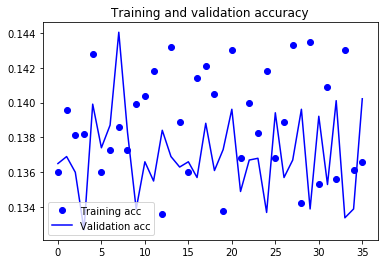

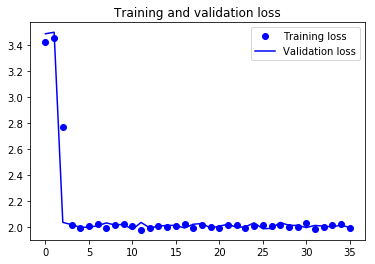

In [53]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Pretrained Try 2

In [ ]:
cnn_base = xception.Xception(weights='imagenet',
                        include_top=False, input_shape=(200,200,3))
model = models.Sequential()
model.add(cnn_base)
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(132, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

for layer in model.layers:
    print(layer.name, layer.trainable)
print(len(model.trainable_weights))


In [26]:
cnn_base = xception.Xception(weights='imagenet',
                        include_top=False, input_shape=(200,200,3))

In [27]:
model = models.Sequential()
model.add(cnn_base)
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(132, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [28]:
for layer in model.layers:
    print(layer.name, layer.trainable)
print(len(model.trainable_weights))

xception True
dropout_1 True
flatten_3 True
dense_5 True
dense_6 True
158


In [29]:
#Freezing cnn_base layer
cnn_base.trainable=False

for layer in model.layers:
    print(layer.name, layer.trainable)
print(len(model.trainable_weights))

xception False
dropout_1 True
flatten_3 True
dense_5 True
dense_6 True
4


In [30]:
train_dir = 'fer2013/Training'
validation_dir = 'fer2013/Validation/'
test_dir = 'fer2013/Test'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(200,200),
        batch_size=100,
        class_mode='categorical')


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(200, 200),
        batch_size=100,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=100,
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [32]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
              metrics=['acc']
             )

# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
callbacks_list = [checkpoint, es]


In [33]:
t1 = time.time()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=400,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=50)
t2 = time.time()
print(t2-t1)

Epoch 1/400
100/100 [==============================] - 35s 346ms/step - loss: 11.9069 - acc: 0.1811 - val_loss: 11.8884 - val_acc: 0.1784

Epoch 00001: val_acc improved from -inf to 0.17839, saving model to weights.best.hdf5
Epoch 2/400
100/100 [==============================] - 30s 303ms/step - loss: 9.9236 - acc: 0.2482 - val_loss: 7.7280 - val_acc: 0.2989

Epoch 00002: val_acc improved from 0.17839 to 0.29886, saving model to weights.best.hdf5
Epoch 3/400
100/100 [==============================] - 30s 302ms/step - loss: 6.5666 - acc: 0.3223 - val_loss: 6.9181 - val_acc: 0.3023

Epoch 00003: val_acc improved from 0.29886 to 0.30233, saving model to weights.best.hdf5
Epoch 4/400
100/100 [==============================] - 30s 304ms/step - loss: 5.9983 - acc: 0.3907 - val_loss: 6.9478 - val_acc: 0.3067

Epoch 00004: val_acc improved from 0.30233 to 0.30667, saving model to weights.best.hdf5
Epoch 5/400
100/100 [==============================] - 30s 305ms/step - loss: 6.1300 - acc: 0.380

val_acc = 0.2934

In [34]:
model.save('transfer_learning_3519.h5')

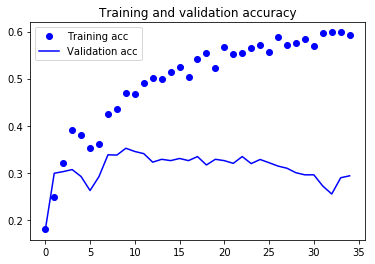

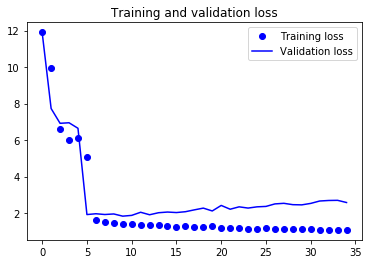

In [43]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# TL #3 - Unfreeze xception with data augmentation

In [104]:
cnn_base = xception.Xception(weights='imagenet',
                        include_top=False, input_shape=(200,200,3))

In [105]:
model = models.Sequential()
model.add(cnn_base)
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(132, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

In [106]:
for layer in model.layers:
    print(layer.name, layer.trainable)
print(len(model.trainable_weights))

xception True
dropout_10 True
flatten_10 True
dense_25 True
dense_26 True
158


In [107]:
#Freezing cnn_base layer
cnn_base.trainable=False

for layer in model.layers:
    print(layer.name, layer.trainable)
print(len(model.trainable_weights))

xception False
dropout_10 True
flatten_10 True
dense_25 True
dense_26 True
4


In [108]:
train_dir = 'fer2013/Training'
validation_dir = 'fer2013/Validation/'
test_dir = 'fer2013/Test'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(200,200),
        batch_size=100,
        class_mode='categorical')


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(200, 200),
        batch_size=100,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=100,
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [109]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
              metrics=['acc']
             )

# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
callbacks_list = [checkpoint, es]


In [110]:
t1 = time.time()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=400,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=50)
t2 = time.time()
print(t2-t1)

Epoch 1/400
100/100 [==============================] - 152s 2s/step - loss: 11.9561 - acc: 0.2508 - val_loss: 12.1508 - val_acc: 0.2461

Epoch 00001: val_acc improved from -inf to 0.24614, saving model to weights.best.hdf5
Epoch 2/400
100/100 [==============================] - 133s 1s/step - loss: 12.1136 - acc: 0.2484 - val_loss: 12.1734 - val_acc: 0.2447

Epoch 00002: val_acc did not improve from 0.24614
Epoch 3/400
100/100 [==============================] - 131s 1s/step - loss: 12.0417 - acc: 0.2526 - val_loss: 12.1647 - val_acc: 0.2453

Epoch 00003: val_acc did not improve from 0.24614
Epoch 4/400
100/100 [==============================] - 132s 1s/step - loss: 12.0461 - acc: 0.2523 - val_loss: 12.1960 - val_acc: 0.2433

Epoch 00004: val_acc did not improve from 0.24614
Epoch 5/400
100/100 [==============================] - 132s 1s/step - loss: 12.0684 - acc: 0.2511 - val_loss: 12.1411 - val_acc: 0.2467

Epoch 00005: val_acc improved from 0.24614 to 0.24674, saving model to weights.

In [111]:
cnn_base.trainable

False

In [112]:
cnn_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 200, 200, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 99, 99, 32)   864         input_9[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 99, 99, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 99, 99, 32)   0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [141]:
for layer in cnn_base.layers:
#     print(layer.name, layer.trainable)
    if layer.name.startswith('block13'):
        print(layer.name)
    if layer.name.startswith('block14'):
        print(layer.name)
    
    

block13_sepconv1_act
block13_sepconv1
block13_sepconv1_bn
block13_sepconv2_act
block13_sepconv2
block13_sepconv2_bn
block13_pool
block14_sepconv1
block14_sepconv1_bn
block14_sepconv1_act
block14_sepconv2
block14_sepconv2_bn
block14_sepconv2_act


unfreeze the last block so it is trainable

In [114]:
cnn_base.trainable=True
set_trainable=False
for layer in cnn_base.layers:
    if layer.name.startswith('block14'):
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False

In [115]:
for layer in model.layers:
    print(layer.name, layer.trainable)
print(len(model.trainable_weights))

xception True
dropout_10 True
flatten_10 True
dense_25 True
dense_26 True
12


In [116]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
              metrics=['acc']
             )

# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
callbacks_list = [checkpoint, es]


In [117]:
t1 = time.time()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=400,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=50)
t2 = time.time()
print(t2-t1)

Epoch 1/400
100/100 [==============================] - 146s 1s/step - loss: 11.9538 - acc: 0.2583 - val_loss: 12.1701 - val_acc: 0.2449

Epoch 00001: val_acc improved from -inf to 0.24494, saving model to weights.best.hdf5
Epoch 2/400
100/100 [==============================] - 124s 1s/step - loss: 12.1208 - acc: 0.2480 - val_loss: 12.1614 - val_acc: 0.2455

Epoch 00002: val_acc improved from 0.24494 to 0.24548, saving model to weights.best.hdf5
Epoch 3/400
100/100 [==============================] - 127s 1s/step - loss: 12.0579 - acc: 0.2519 - val_loss: 12.1281 - val_acc: 0.2475

Epoch 00003: val_acc improved from 0.24548 to 0.24754, saving model to weights.best.hdf5
Epoch 4/400
100/100 [==============================] - 126s 1s/step - loss: 12.0946 - acc: 0.2496 - val_loss: 12.2703 - val_acc: 0.2387

Epoch 00004: val_acc did not improve from 0.24754
Epoch 5/400
100/100 [==============================] - 127s 1s/step - loss: 12.1466 - acc: 0.2464 - val_loss: 12.1226 - val_acc: 0.2479

E

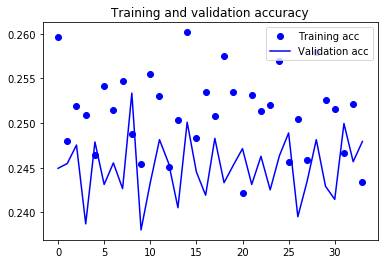

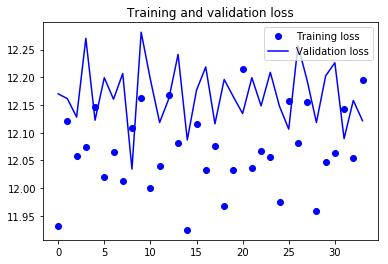

In [118]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [119]:
model.save('transfer_learning_unfreeze_2533.h5')

# TL #4 - unfreeze, no data augmentation

In [121]:
cnn_base = xception.Xception(weights='imagenet',
                        include_top=False, input_shape=(200,200,3))
model = models.Sequential()
model.add(cnn_base)
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(132, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

for layer in model.layers:
    print(layer.name, layer.trainable)
print(len(model.trainable_weights))


xception True
dropout_11 True
flatten_11 True
dense_27 True
dense_28 True
158


In [122]:
#Freezing cnn_base layer
cnn_base.trainable=False

for layer in model.layers:
    print(layer.name, layer.trainable)
print(len(model.trainable_weights))

xception False
dropout_11 True
flatten_11 True
dense_27 True
dense_28 True
4


In [129]:
train_dir = 'fer2013/Training'
validation_dir = 'fer2013/Validation/'
test_dir = 'fer2013/Test'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(200,200),
        batch_size=100,
        class_mode='categorical')


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(200, 200),
        batch_size=100,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=100,
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [130]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
              metrics=['acc']
             )

# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
callbacks_list = [checkpoint, es]


In [131]:
t1=datetime.datetime.now()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=400,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=50)
t2 = datetime.datetime.now()
print(t2-t1)

Epoch 1/400
100/100 [==============================] - 70s 697ms/step - loss: 11.5838 - acc: 0.1979 - val_loss: 12.3236 - val_acc: 0.1585

Epoch 00001: val_acc improved from -inf to 0.15855, saving model to weights.best.hdf5
Epoch 2/400
100/100 [==============================] - 53s 529ms/step - loss: 10.9594 - acc: 0.1972 - val_loss: 11.5914 - val_acc: 0.1986

Epoch 00002: val_acc improved from 0.15855 to 0.19864, saving model to weights.best.hdf5
Epoch 3/400
100/100 [==============================] - 61s 607ms/step - loss: 10.6215 - acc: 0.2144 - val_loss: 10.8522 - val_acc: 0.1621

Epoch 00003: val_acc did not improve from 0.19864
Epoch 4/400
100/100 [==============================] - 55s 549ms/step - loss: 7.0317 - acc: 0.2986 - val_loss: 6.6640 - val_acc: 0.3159

Epoch 00004: val_acc improved from 0.19864 to 0.31589, saving model to weights.best.hdf5
Epoch 5/400
100/100 [==============================] - 59s 591ms/step - loss: 5.7873 - acc: 0.3506 - val_loss: 6.3496 - val_acc: 0.3

val_acc 0.2967

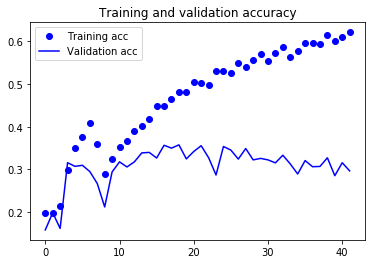

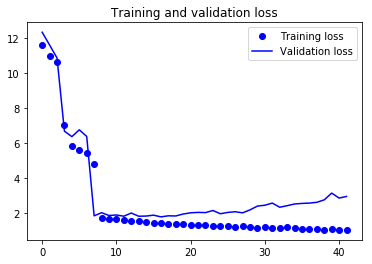

In [132]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [133]:
cnn_base.trainable

False

set last block as trainable

In [134]:
cnn_base.trainable=True
set_trainable=False
for layer in cnn_base.layers:
    if layer.name.startswith('block14'):
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False

In [135]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
              metrics=['acc']
             )

# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
callbacks_list = [checkpoint, es]

In [136]:
t1=datetime.datetime.now()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=400,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=50)
t2 = datetime.datetime.now()
print(t2-t1)

Epoch 1/400
100/100 [==============================] - 70s 700ms/step - loss: 1.2836 - acc: 0.5265 - val_loss: 1.5240 - val_acc: 0.4536

Epoch 00001: val_acc improved from -inf to 0.45360, saving model to weights.best.hdf5
Epoch 2/400
100/100 [==============================] - 47s 474ms/step - loss: 1.0783 - acc: 0.6080 - val_loss: 1.5129 - val_acc: 0.4540

Epoch 00002: val_acc improved from 0.45360 to 0.45400, saving model to weights.best.hdf5
Epoch 3/400
100/100 [==============================] - 50s 498ms/step - loss: 1.0845 - acc: 0.6016 - val_loss: 1.3658 - val_acc: 0.4770

Epoch 00003: val_acc improved from 0.45400 to 0.47705, saving model to weights.best.hdf5
Epoch 4/400
100/100 [==============================] - 50s 496ms/step - loss: 1.0428 - acc: 0.6205 - val_loss: 1.3355 - val_acc: 0.5095

Epoch 00004: val_acc improved from 0.47705 to 0.50952, saving model to weights.best.hdf5
Epoch 5/400
100/100 [==============================] - 48s 481ms/step - loss: 0.5961 - acc: 0.7852 

In [137]:
model.save('transfer_learning_unfreeze_5460.h5')

set last two blocks to trainable

In [138]:
print(len(model.trainable_weights))

12


In [142]:
for layer in cnn_base.layers:
    print(layer.name, layer.trainable)
print(len(cnn_base.trainable_weights))

input_10 False
block1_conv1 False
block1_conv1_bn False
block1_conv1_act False
block1_conv2 False
block1_conv2_bn False
block1_conv2_act False
block2_sepconv1 False
block2_sepconv1_bn False
block2_sepconv2_act False
block2_sepconv2 False
block2_sepconv2_bn False
conv2d_41 False
block2_pool False
batch_normalization_41 False
add_109 False
block3_sepconv1_act False
block3_sepconv1 False
block3_sepconv1_bn False
block3_sepconv2_act False
block3_sepconv2 False
block3_sepconv2_bn False
conv2d_42 False
block3_pool False
batch_normalization_42 False
add_110 False
block4_sepconv1_act False
block4_sepconv1 False
block4_sepconv1_bn False
block4_sepconv2_act False
block4_sepconv2 False
block4_sepconv2_bn False
conv2d_43 False
block4_pool False
batch_normalization_43 False
add_111 False
block5_sepconv1_act False
block5_sepconv1 False
block5_sepconv1_bn False
block5_sepconv2_act False
block5_sepconv2 False
block5_sepconv2_bn False
block5_sepconv3_act False
block5_sepconv3 False
block5_sepconv3_bn F

In [156]:
for layer in cnn_base.layers[-16:]:
    print(layer.name, layer.trainable)

block13_sepconv1_act False
block13_sepconv1 False
block13_sepconv1_bn False
block13_sepconv2_act False
block13_sepconv2 False
block13_sepconv2_bn False
conv2d_44 False
block13_pool False
batch_normalization_44 False
add_120 False
block14_sepconv1 True
block14_sepconv1_bn True
block14_sepconv1_act True
block14_sepconv2 True
block14_sepconv2_bn True
block14_sepconv2_act True


set block 13 and 14 to trainable

In [160]:
cnn_base.trainable=True
set_trainable=False
for layer in cnn_base.layers[-16:]:
    set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False

In [161]:
for layer in cnn_base.layers[-16:]:
    print(layer.name, layer.trainable)

block13_sepconv1_act True
block13_sepconv1 True
block13_sepconv1_bn True
block13_sepconv2_act True
block13_sepconv2 True
block13_sepconv2_bn True
conv2d_44 True
block13_pool True
batch_normalization_44 True
add_120 True
block14_sepconv1 True
block14_sepconv1_bn True
block14_sepconv1_act True
block14_sepconv2 True
block14_sepconv2_bn True
block14_sepconv2_act True


In [162]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
              metrics=['acc']
             )

# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
callbacks_list = [checkpoint, es]

In [163]:
t1=datetime.datetime.now()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=400,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=50)
t2 = datetime.datetime.now()
print(t2-t1)

Epoch 1/400
100/100 [==============================] - 76s 759ms/step - loss: 0.3561 - acc: 0.8816 - val_loss: 2.7489 - val_acc: 0.3988

Epoch 00001: val_acc improved from -inf to 0.39875, saving model to weights.best.hdf5
Epoch 2/400
100/100 [==============================] - 54s 541ms/step - loss: 0.3448 - acc: 0.8813 - val_loss: 2.2428 - val_acc: 0.5119

Epoch 00002: val_acc improved from 0.39875 to 0.51193, saving model to weights.best.hdf5
Epoch 3/400
100/100 [==============================] - 59s 588ms/step - loss: 0.3542 - acc: 0.8801 - val_loss: 2.1321 - val_acc: 0.5384

Epoch 00003: val_acc improved from 0.51193 to 0.53838, saving model to weights.best.hdf5
Epoch 4/400
100/100 [==============================] - 57s 566ms/step - loss: 0.3281 - acc: 0.8868 - val_loss: 2.1869 - val_acc: 0.4982

Epoch 00004: val_acc did not improve from 0.53838
Epoch 5/400
100/100 [==============================] - 57s 567ms/step - loss: 0.2235 - acc: 0.9205 - val_loss: 2.1552 - val_acc: 0.5093

E

In [164]:
model.save('transfer_learning_unfreeze_5822.h5')

In [168]:
for layer in cnn_base.layers[-26:]:
    print(layer.name, layer.trainable)

block12_sepconv1_act False
block12_sepconv1 False
block12_sepconv1_bn False
block12_sepconv2_act False
block12_sepconv2 False
block12_sepconv2_bn False
block12_sepconv3_act False
block12_sepconv3 False
block12_sepconv3_bn False
add_119 False
block13_sepconv1_act True
block13_sepconv1 True
block13_sepconv1_bn True
block13_sepconv2_act True
block13_sepconv2 True
block13_sepconv2_bn True
conv2d_44 True
block13_pool True
batch_normalization_44 True
add_120 True
block14_sepconv1 True
block14_sepconv1_bn True
block14_sepconv1_act True
block14_sepconv2 True
block14_sepconv2_bn True
block14_sepconv2_act True


block 12 trainable

In [169]:
cnn_base.trainable=True
set_trainable=False
for layer in cnn_base.layers[-26:]:
    set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False

In [170]:
for layer in cnn_base.layers[-26:]:
    print(layer.name, layer.trainable)

block12_sepconv1_act True
block12_sepconv1 True
block12_sepconv1_bn True
block12_sepconv2_act True
block12_sepconv2 True
block12_sepconv2_bn True
block12_sepconv3_act True
block12_sepconv3 True
block12_sepconv3_bn True
add_119 True
block13_sepconv1_act True
block13_sepconv1 True
block13_sepconv1_bn True
block13_sepconv2_act True
block13_sepconv2 True
block13_sepconv2_bn True
conv2d_44 True
block13_pool True
batch_normalization_44 True
add_120 True
block14_sepconv1 True
block14_sepconv1_bn True
block14_sepconv1_act True
block14_sepconv2 True
block14_sepconv2_bn True
block14_sepconv2_act True


In [171]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
              metrics=['acc']
             )

# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
callbacks_list = [checkpoint, es]

In [172]:
t1=datetime.datetime.now()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=400,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=50)
t2 = datetime.datetime.now()
print(t2-t1)

Epoch 1/400
100/100 [==============================] - 78s 784ms/step - loss: 0.1878 - acc: 0.9393 - val_loss: 2.1612 - val_acc: 0.5548

Epoch 00001: val_acc improved from -inf to 0.55482, saving model to weights.best.hdf5
Epoch 2/400
100/100 [==============================] - 56s 561ms/step - loss: 0.2099 - acc: 0.9322 - val_loss: 2.4548 - val_acc: 0.5215

Epoch 00002: val_acc did not improve from 0.55482
Epoch 3/400
100/100 [==============================] - 60s 596ms/step - loss: 0.1547 - acc: 0.9500 - val_loss: 2.2601 - val_acc: 0.5725

Epoch 00003: val_acc improved from 0.55482 to 0.57252, saving model to weights.best.hdf5
Epoch 4/400
100/100 [==============================] - 60s 595ms/step - loss: 0.1517 - acc: 0.9497 - val_loss: 2.0231 - val_acc: 0.5779

Epoch 00004: val_acc improved from 0.57252 to 0.57787, saving model to weights.best.hdf5
Epoch 5/400
100/100 [==============================] - 60s 597ms/step - loss: 0.1595 - acc: 0.9452 - val_loss: 2.3724 - val_acc: 0.5500

E

val_acc 0.5749

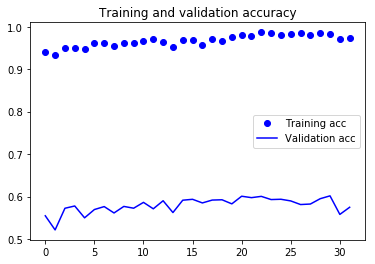

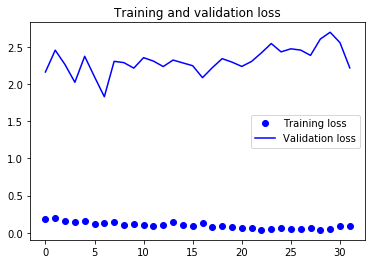

In [173]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [174]:
model.save('transfer_learning_unfreeze_6017.h5')

## Blocks 9 - 14 trainable

In [181]:
for layer in cnn_base.layers[-56:]:
    print(layer.name, layer.trainable)

block9_sepconv1_act False
block9_sepconv1 False
block9_sepconv1_bn False
block9_sepconv2_act False
block9_sepconv2 False
block9_sepconv2_bn False
block9_sepconv3_act False
block9_sepconv3 False
block9_sepconv3_bn False
add_116 False
block10_sepconv1_act False
block10_sepconv1 False
block10_sepconv1_bn False
block10_sepconv2_act False
block10_sepconv2 False
block10_sepconv2_bn False
block10_sepconv3_act False
block10_sepconv3 False
block10_sepconv3_bn False
add_117 False
block11_sepconv1_act False
block11_sepconv1 False
block11_sepconv1_bn False
block11_sepconv2_act False
block11_sepconv2 False
block11_sepconv2_bn False
block11_sepconv3_act False
block11_sepconv3 False
block11_sepconv3_bn False
add_118 False
block12_sepconv1_act True
block12_sepconv1 True
block12_sepconv1_bn True
block12_sepconv2_act True
block12_sepconv2 True
block12_sepconv2_bn True
block12_sepconv3_act True
block12_sepconv3 True
block12_sepconv3_bn True
add_119 True
block13_sepconv1_act True
block13_sepconv1 True
blo

In [182]:
cnn_base.trainable=True
set_trainable=False
for layer in cnn_base.layers[-56:]:
    set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
              metrics=['acc']
             )

# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
callbacks_list = [checkpoint, es]

t1=datetime.datetime.now()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=400,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=50)
t2 = datetime.datetime.now()
print(t2-t1)

Epoch 1/400
100/100 [==============================] - 261s 3s/step - loss: 0.3190 - acc: 0.8937 - val_loss: 2.1177 - val_acc: 0.5558

Epoch 00001: val_acc improved from -inf to 0.55582, saving model to weights.best.hdf5
Epoch 2/400
100/100 [==============================] - 230s 2s/step - loss: 0.2927 - acc: 0.9025 - val_loss: 2.0277 - val_acc: 0.5516

Epoch 00002: val_acc did not improve from 0.55582
Epoch 3/400
100/100 [==============================] - 232s 2s/step - loss: 0.2539 - acc: 0.9164 - val_loss: 1.5328 - val_acc: 0.5923

Epoch 00003: val_acc improved from 0.55582 to 0.59230, saving model to weights.best.hdf5
Epoch 4/400
100/100 [==============================] - 232s 2s/step - loss: 0.2399 - acc: 0.9186 - val_loss: 1.7622 - val_acc: 0.5836

Epoch 00004: val_acc did not improve from 0.59230
Epoch 5/400
100/100 [==============================] - 230s 2s/step - loss: 0.2016 - acc: 0.9358 - val_loss: 1.9220 - val_acc: 0.5769

Epoch 00005: val_acc did not improve from 0.59230


#### broken kernel

In [11]:
model = load_model('transfer_learning_unfreeze_6017.h5')

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 7, 7, 2048)        20861480  
_________________________________________________________________
dropout_11 (Dropout)         (None, 7, 7, 2048)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 100352)            0         
_________________________________________________________________
dense_27 (Dense)             (None, 132)               13246596  
_________________________________________________________________
dense_28 (Dense)             (None, 7)                 931       
Total params: 34,109,007
Trainable params: 21,649,887
Non-trainable params: 12,459,120
_________________________________________________________________


In [15]:
for layer in model.layers[-56:]:
    print(layer.name, layer.trainable)

xception True
dropout_11 True
flatten_11 True
dense_27 True
dense_28 True


In [6]:
cnn_base = xception.Xception(weights='imagenet',
                        include_top=False, input_shape=(200,200,3))

In [16]:
for layer in cnn_base.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 True
block1_conv1_bn True
block1_conv1_act True
block1_conv2 True
block1_conv2_bn True
block1_conv2_act True
block2_sepconv1 True
block2_sepconv1_bn True
block2_sepconv2_act True
block2_sepconv2 True
block2_sepconv2_bn True
conv2d_1 True
block2_pool True
batch_normalization_1 True
add_1 True
block3_sepconv1_act True
block3_sepconv1 True
block3_sepconv1_bn True
block3_sepconv2_act True
block3_sepconv2 True
block3_sepconv2_bn True
conv2d_2 True
block3_pool True
batch_normalization_2 True
add_2 True
block4_sepconv1_act True
block4_sepconv1 True
block4_sepconv1_bn True
block4_sepconv2_act True
block4_sepconv2 True
block4_sepconv2_bn True
conv2d_3 True
block4_pool True
batch_normalization_3 True
add_3 True
block5_sepconv1_act True
block5_sepconv1 True
block5_sepconv1_bn True
block5_sepconv2_act True
block5_sepconv2 True
block5_sepconv2_bn True
block5_sepconv3_act True
block5_sepconv3 True
block5_sepconv3_bn True
add_4 True
block6_sepconv1_act True
block6_sepconv1 

In [12]:
train_dir = 'fer2013/Training'
validation_dir = 'fer2013/Validation/'
test_dir = 'fer2013/Test'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(200,200),
        batch_size=100,
        class_mode='categorical')


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(200, 200),
        batch_size=100,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=100,
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [27]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
              metrics=['acc']
             )

# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
callbacks_list = [checkpoint, es]

t1=datetime.datetime.now()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=400,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=50)
t2 = datetime.datetime.now()
print(t2-t1)

Epoch 1/400
100/100 [==============================] - 48s 478ms/step - loss: 0.0790 - acc: 0.9736 - val_loss: 2.6248 - val_acc: 0.5935

Epoch 00001: val_acc improved from -inf to 0.59351, saving model to weights.best.hdf5
Epoch 2/400
100/100 [==============================] - 39s 388ms/step - loss: 0.0907 - acc: 0.9696 - val_loss: 2.4504 - val_acc: 0.5895

Epoch 00002: val_acc did not improve from 0.59351
Epoch 3/400
100/100 [==============================] - 39s 388ms/step - loss: 0.0954 - acc: 0.9699 - val_loss: 2.6527 - val_acc: 0.5771

Epoch 00003: val_acc did not improve from 0.59351
Epoch 4/400
100/100 [==============================] - 39s 386ms/step - loss: 0.0638 - acc: 0.9781 - val_loss: 2.5739 - val_acc: 0.5841

Epoch 00004: val_acc did not improve from 0.59351
Epoch 5/400
100/100 [==============================] - 38s 385ms/step - loss: 0.0734 - acc: 0.9752 - val_loss: 2.3557 - val_acc: 0.5965

Epoch 00005: val_acc improved from 0.59351 to 0.59651, saving model to weights.

100/100 [==============================] - 40s 399ms/step - loss: 0.0535 - acc: 0.9824 - val_loss: 2.5986 - val_acc: 0.5851

Epoch 00043: val_acc did not improve from 0.61275
Epoch 44/400
100/100 [==============================] - 40s 398ms/step - loss: 0.0468 - acc: 0.9823 - val_loss: 2.5217 - val_acc: 0.5970

Epoch 00044: val_acc did not improve from 0.61275
Epoch 00044: early stopping
0:28:57.973754


In [28]:
model.save('transfer_learning_unfreeze_6127.h5')

In [24]:
#Freezing cnn_base layer
cnn_base.trainable=False

for layer in model.layers:
    print(layer.name, layer.trainable)
print(len(model.trainable_weights))

xception True
dropout_11 True
flatten_11 True
dense_27 True
dense_28 True
35


In [29]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
              metrics=['acc']
             )

# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
callbacks_list = [checkpoint, es]

t1=datetime.datetime.now()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=400,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=50)
t2 = datetime.datetime.now()
print(t2-t1)

Epoch 1/400
100/100 [==============================] - 45s 448ms/step - loss: 0.0473 - acc: 0.9852 - val_loss: 2.8066 - val_acc: 0.5929

Epoch 00001: val_acc improved from -inf to 0.59290, saving model to weights.best.hdf5
Epoch 2/400
100/100 [==============================] - 39s 385ms/step - loss: 0.0577 - acc: 0.9823 - val_loss: 2.7184 - val_acc: 0.5944

Epoch 00002: val_acc improved from 0.59290 to 0.59442, saving model to weights.best.hdf5
Epoch 3/400
100/100 [==============================] - 39s 389ms/step - loss: 0.0493 - acc: 0.9840 - val_loss: 2.9198 - val_acc: 0.5961

Epoch 00003: val_acc improved from 0.59442 to 0.59611, saving model to weights.best.hdf5
Epoch 4/400
100/100 [==============================] - 39s 394ms/step - loss: 0.0523 - acc: 0.9832 - val_loss: 2.6662 - val_acc: 0.6023

Epoch 00004: val_acc improved from 0.59611 to 0.60233, saving model to weights.best.hdf5
Epoch 5/400
100/100 [==============================] - 39s 390ms/step - loss: 0.0566 - acc: 0.9821 

100/100 [==============================] - 41s 414ms/step - loss: 0.0268 - acc: 0.9916 - val_loss: 2.9048 - val_acc: 0.6109

Epoch 00043: val_acc did not improve from 0.61993
Epoch 44/400
100/100 [==============================] - 40s 402ms/step - loss: 0.0217 - acc: 0.9918 - val_loss: 2.8776 - val_acc: 0.6194

Epoch 00044: val_acc did not improve from 0.61993
Epoch 45/400
100/100 [==============================] - 41s 414ms/step - loss: 0.0339 - acc: 0.9888 - val_loss: 2.9700 - val_acc: 0.5991

Epoch 00045: val_acc did not improve from 0.61993
Epoch 46/400
100/100 [==============================] - 41s 411ms/step - loss: 0.0285 - acc: 0.9915 - val_loss: 2.6236 - val_acc: 0.6153

Epoch 00046: val_acc did not improve from 0.61993
Epoch 47/400
100/100 [==============================] - 41s 408ms/step - loss: 0.0297 - acc: 0.9894 - val_loss: 2.9932 - val_acc: 0.6204

Epoch 00047: val_acc improved from 0.61993 to 0.62036, saving model to weights.best.hdf5
Epoch 48/400
100/100 [============

# TL #5 - no frozen layers

In [3]:
cnn_base = xception.Xception(weights='imagenet',
                        include_top=False, input_shape=(150,150,3))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
train_dir = 'fer2013/Training'
validation_dir = 'fer2013/Validation/'
test_dir = 'fer2013/Test'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(150,150),
        batch_size=64,
        class_mode='categorical')


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150,150),
        batch_size=64,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=64,
        class_mode='categorical')

model = models.Sequential()
model.add(cnn_base)
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(132, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
              metrics=['acc']
             )

# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
callbacks_list = [checkpoint, es]

t1=datetime.datetime.now()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=400,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=50)
t2 = datetime.datetime.now()
print(t2-t1)

Found 28709 images belonging to 7 classes.
Found 1019 images belonging to 1 classes.
Found 3589 images belonging to 7 classes.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/400
100/100 [==============================] - 54s 536ms/step - loss: 1.6859 - acc: 0.3880 - val_loss: 1.6839 - val_acc: 0.3984

Epoch 00001: val_acc improved from -inf to 0.39844, saving model to weights.best.hdf5
Epoch 2/400
100/100 [==============================] - 43s 433ms/step - loss: 1.2700 - acc: 0.5214 - val_loss: 1.4267 - val_acc: 0.5068

Epoch 00002: val_acc improved from 0.39844 to 0.50684, saving model to weights.best.hdf5
Epoch 3/400
100/100 [==============================] - 43s 432ms/step - loss: 1.2045 - acc: 0.5458 - val_loss: 1.2859 - val_acc: 0.5530

Epoch 00003: val_acc improved from 0.50684 to 0.55301, saving model to weights.best.hdf5
Epoch 4/400
100/100 [==============


Epoch 00038: val_acc did not improve from 0.65075
Epoch 39/400
100/100 [==============================] - 42s 425ms/step - loss: 0.2886 - acc: 0.9020 - val_loss: 1.4239 - val_acc: 0.6323

Epoch 00039: val_acc did not improve from 0.65075
Epoch 40/400
100/100 [==============================] - 42s 425ms/step - loss: 0.2954 - acc: 0.8994 - val_loss: 1.2304 - val_acc: 0.6641

Epoch 00040: val_acc improved from 0.65075 to 0.66412, saving model to weights.best.hdf5
Epoch 41/400
100/100 [==============================] - 42s 425ms/step - loss: 0.2147 - acc: 0.9272 - val_loss: 1.5425 - val_acc: 0.6338

Epoch 00041: val_acc did not improve from 0.66412
Epoch 42/400
100/100 [==============================] - 43s 426ms/step - loss: 0.1977 - acc: 0.9352 - val_loss: 1.4626 - val_acc: 0.6230

Epoch 00042: val_acc did not improve from 0.66412
Epoch 43/400
100/100 [==============================] - 43s 425ms/step - loss: 0.2234 - acc: 0.9270 - val_loss: 1.8300 - val_acc: 0.5963

Epoch 00043: val_acc

In [5]:
model.save('xception_6641.h5')

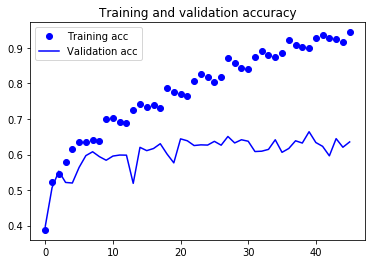

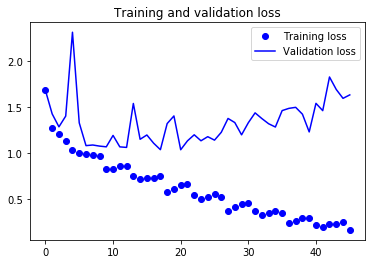

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()